# Tarea 1- Mecánica del continuo 

### 1. Tensor de esfuerzos horizontales 2D : 

$$\tau = \left( \begin{array}{lcr} \tau_{xx} & \tau_{xy}\\ \tau_{yx} & \tau_{yy} \\\end{array} \right)
= \left( \begin{array}{lcr} -30 & -20\\ -20 & -40 \\\end{array} \right) Mpa
$$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA

####  Definiendo una función donde
A es una matriz 2x2 compuesta por a,b,c,d y es el Tensor de esfuerzos 2D
$$A = \left( \begin{array}{lcr} a & b\\ c & d \\\end{array} \right)$$
ang es el angulo en grados y un las unidades en las que se encuentran los componenetes de la matriz

In [2]:
def calcularEsfuerzosNE(a,b,c,d,un,ang):
    #Comvertir de rad a deg:
    A=np.array([[a, b],[c, d]])
    r= (ang*np.pi)/180
    #Primero realizar el análisis trigonometrico 
    c_n= (np.sin(r),np.cos(r))
    c_s= (np.cos(r),-np.sin(r))
    #Ahora se calculan componentes:
    n_res = np.matmul(A, c_n)
    s_res = np.matmul(A, c_s)
    #Finalmente magnitudes
    
    n= np.matmul(n_res, c_n)
    s= np.matmul(s_res, c_s)
    
    #Ahora vamos a calcular los esfuerzos principales econtrando los eigen valores 
    #y vectore para A
    
    eig,v=LA.eig(A)
    if eig[0] >= eig[1]:
        o_1=eig[0]
        o_2=eig[1]
    else:
        o_1=eig[1]
        o_2=eig[2]
   
    
    #Por ultimo calcularemos los azimuts haciendo uso de algebra lineal c
    azo1=(np.arctan(v[1,0]/v[0,0])*180)/np.pi
    azo2=(np.arctan(v[1,1]/v[0,1])*180)/np.pi
    #Retorna los resultados
    return "El esfuerzo normal es", n, un,"y el esfuero de cizalla es", s,un, "para un rumbo de", ang,"grados NE", "esfueros principales", o_1,un, "y", o_2, un, "Azimuts respectivos en ", azo1+360, "y", azo2  


In [7]:
#a.) Esfuerzo normal y de cizalla en la falla de rumbo 10°N
#b.) Esfuerzos principales y azimuts
calcularEsfuerzosNE(-30,-20,-20,-40,un="Mpa",ang=10)

('El esfuerzo normal es',
 -46.53886597044291,
 'Mpa',
 'y el esfuero de cizalla es',
 -23.461134029557087,
 'Mpa',
 'para un rumbo de',
 10,
 'grados NE',
 'esfueros principales',
 -14.384471871911696,
 'Mpa',
 'y',
 -55.6155281280883,
 'Mpa',
 'Azimuts respectivos en ',
 322.01812173396326,
 'y',
 52.01812173396325)

## 3. Falla de San Andrés

In [34]:
#enocntrando la matriz de esfuerzos
def smatriz(E,G,v):
    a=(1/E)
    b=(-v/E)
    c=(1/(G))
    
    B=np.array([[a,b,0],
               [b,a,0],
               [0,0,c]])
    return B
def Ee(v,G):
    return 2*G*(1+v)

def Resmatriz(A,B):
    Binv= LA.inv(B)
    C= np.matmul(Binv,A)
    return C
#Calculando E, asumismos v=,25lp
EE=Ee(.25,27*10**9)


In [35]:
Amb=smatriz(EE,27*10**9,.25)
Bmb=np.array([[2],[1],[80/400]])

In [37]:
Resmatriz(Bmb,Amb)

array([[1.62e+11],
       [1.08e+11],
       [5.40e+09]])

In [38]:
200*5.40e+09

1080000000000.0

## 4. Módulos elásticos en el laboratorio

In [2]:
#Módulo de Poisson
def poisson(E,G):
    return (E/(2*G)) -1

In [3]:
poisson(30*10**6,12*10**6)

0.25

In [4]:
A= np.array([0.004,0.006,0.001,0.001,0,0.004])
def Bmatriz(E,G,v):
    a=(1/E)
    b=(-v/E)
    c=(1/(2*G))
    
    B=np.array([[a,b,b,0,0,0],
               [b,a,b,0,0,0],
               [b,b,a,0,0,0],
               [0,0,0,c,0,0],
               [0,0,0,0,c,0],
               [0,0,0,0,0,c]])
    return B
C= []


In [5]:
B=Bmatriz(30*10**6,12*10**6,0.25)

In [6]:
B

array([[ 3.33333333e-08, -8.33333333e-09, -8.33333333e-09,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-8.33333333e-09,  3.33333333e-08, -8.33333333e-09,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-8.33333333e-09, -8.33333333e-09,  3.33333333e-08,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         4.16666667e-08,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  4.16666667e-08,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  4.16666667e-08]])

In [7]:
def Cmatriz(A,B):
    Binv= LA.inv(B)
    C= np.matmul(Binv,A)
    return C

In [8]:
C=Cmatriz(A,B)

In [9]:
C

array([228000., 276000., 156000.,  24000.,      0.,  96000.])

In [18]:
#Organizando la matriz 
def finalMatrix(s):
    i=0
    a=np.array([[s[i],s[i+3],0],[s[i+3],s[i+1],s[i+5]],[0,s[i+5],s[i+2]]])
    return a

In [19]:
CF=finalMatrix(C)
print(CF)

[[228000.  24000.      0.]
 [ 24000. 276000.  96000.]
 [     0.  96000. 156000.]]


## 5. Tensor de deformación Colombia
$$\sigma_{ij} = \left( \begin{array}{lcr} 3 & -10 & 0 \\ -10 & 0 & 30 \\ 0 & 30 & -27 \\\end{array} \right)  Pa $$

In [13]:
#Iniciamos a descomponer el tensor en primero la parte hidrostática,
#Eigen values para esfuerzos principales 

M=np.array([[3,-10,0],[-10,0,30],[0,30,-27]])
w,v=LA.eig(M)
o1=0
o2=0
o3=0

if w[0]>w[1] and w[0]>w[2]:
    o1=w[0]
    if w[1]>w[2]:
        o2=w[1]
        o3=w[2]
    else:
        o2=w[2]
        o3=w[1]
elif w[1]>w[0] and w[1]>w[2]:
    o1=w[1]
    if w[0]>w[2]:
        o2=w[0]
        o3=w[2]
    else:
        o2=w[2]
        o3=w[0]
else:
    o1=w[2]
    if w[0]>w[1]:
        o2=w[0]
        o3=w[1]
    else:
        o2=w[1]
        o3=w[0]

o1,o2,o3

(23.000000000000004, 2.6645352591003757e-15, -47.0)

In [14]:
#Ahora encontramos el promedio
O=(o1+o2+o3)/3
O


-7.999999999999997

In [15]:
#Finalmente esfuerzo deviatorico del tensor
Odev=np.array([[3-O,-10,0],[-10,0-O,30],[0,30,-27-O]])

In [16]:
Odev

array([[ 11., -10.,   0.],
       [-10.,   8.,  30.],
       [  0.,  30., -19.]])

## 6. Parametros de Lamé

In [17]:
mu= 2700*(3500)**2
mu

33075000000

In [18]:
K=2700*(6000)**2-(4/3)*mu
K

53100000000.0

In [19]:
lamda=K-(2/3)*mu
lamda

31050000000.0

### 7.Medidor de deformación terremoto
 
 $$ \begin{array}{lcr}\varepsilon_{xx}\\\varepsilon_{yy}\\\varepsilon_{xy}\\\end{array}= \begin{array}{lcr}-0.26\times10^{-6} \\-0.92\times10^{-6} \\-0.69\times10^{-6} \end{array}   $$

In [26]:
#Modulo de Young
G1=3.3*10**10
v1=0.25
E1=2*G1*(1+v1)

In [27]:
#Incorporamos nuestros datos en la matriz 
def matriz(E,G,v):
    a=(1/E)
    b=(-v/E)
    c=(1/(G))
    
    B=np.array([[a,b,0],
               [b,a,0],
               [0,0,c]])
    return B

In [28]:
Am=matriz(E1,G1,v1)
Bm=np.array([[-0.26*10**-6],[-0.92*10**-6],[-0.69**10-6]])

In [29]:
Am

array([[ 1.21212121e-11, -3.03030303e-12,  0.00000000e+00],
       [-3.03030303e-12,  1.21212121e-11,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  3.03030303e-11]])

In [30]:
def Resmatriz(A,B):
    Binv= LA.inv(B)
    C= np.matmul(Binv,A)
    return C

In [31]:
Resmatriz(Bm,Am)

array([[-4.31200000e+04],
       [-8.66800000e+04],
       [-1.98807244e+11]])

In [42]:
#Modulo de Young, donde o es el esfuerzo diferencial y e la deformaciín
def Young(o,e):
    E=o/e
    return E

In [43]:
#Porcentajes de e aproximados a la grafica
print (Young(200,.8),Young(1200,2.5),Young(2100,3.9))

250.0 480.0 538.4615384615385


In [44]:

y=(250.0, 480.0, 538.4615384615385)
x=(0,200,400)

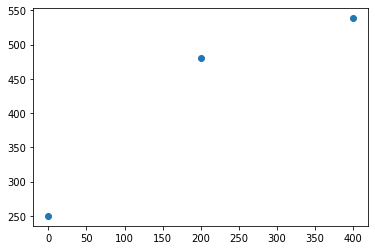

In [45]:
plt.scatter(x,y)

In [46]:
def normal(o_1,o_3,ra):  
    r= (ra*np.pi)/180
    return ((o_1+o_3)/2)+((o_1-o_3)/2)*np.cos(2*r)
def cizala(o_1,o_3,ra) :
    r= (ra*np.pi)/180
    return ((o_1-o_3)/2)*np.sin(2*r)


In [47]:
print(normal(200,0,-70),cizala(200,0,-70))

23.395555688102206 -64.27876096865394


In [48]:
m=(-64.27876096865394-0)/(23.395555688102206-100)

In [49]:
m

0.8390996311772803

In [130]:
mu=-1/m

In [131]:
mu

-1.1917535925942095

In [134]:
C=-64.27876096865394-(mu*23.395555688102206)

In [135]:
C


-36.397023426620244

In [136]:
T=C/2

In [137]:
T

-18.198511713310122

### 2. Roca a profundidad en la corteza
$$1. \dfrac{\sigma_{1}}{\sigma_{3}}=\dfrac{2}{3} $$
 $$2. \tau=\dfrac{(\sigma_{1}-\sigma_{3})}{2}sen2\theta$$
 depejando:
 
 $$\sigma_{3}=\dfrac{2}{3}\sigma_{1}$$
 $$\tau=\dfrac{\sigma_{1}-\dfrac{2}{3}\sigma_{1}}{2}sen(2\theta)$$
 
 finalmente,
 
 $$\sigma_{1}=\dfrac{(6\tau)}{sen(2\theta)} $$

In [16]:
def o_11(tau,ang):
    b= (ang*np.pi)/180
    return (6*tau)/np.sin(2*b)
def o3(o1):
    return 2/3*o1
def om(o1,oo3):
    return (o1+oo3)/2
def z(om,rho=2700,g=9.8):
    return om/(rho*g)

In [9]:
o111=o_11(10**7,45)

In [14]:
o33=o3(o111)
omm=om(o111,o33)

In [17]:
z(omm)

1889.6447467876037

In [149]:
def p(z,rho=2700,g=9.8):
    return z*rho*g

In [151]:
p(2000)

52920000.00000001

In [152]:
o222=p(2000)*(2/3)

In [153]:
o222

35280000.0

## Griffith
$$  \sigma_{critico}=(\dfrac{2E\gamma}{\pi c})^{1/2}=>c=\dfrac{2E\gamma}{\sigma_{crit}^{2}\pi}$$

In [4]:
def c(E,y,oc,pi=np.pi):
    return (2*E*y)/oc**2*pi

In [5]:
a=2*c(7*10**9,.5,.15*10**9)
a

1.9547687622336493e-06

## Teoria LEFM
1.$$K_{N}= \sigma\sqrt{\pi c}$$

In [14]:
#definimos K
def K (o,c,pi=np.pi):
    return o*((pi*c)**(1/2))

In [15]:
Rocas=[1570,1830,600]
Kf=[]
for i in range(len(Rocas)):
    Kf.append(K(2/3*(Rocas[i]),1))
Kf

[1855.168363947773, 2162.3936981047295, 708.9815403622064]

In [16]:
2/3*1570

1046.6666666666665

In [17]:
K(1046.6,1)

1855.0502003577128

## Teoria LEFM
2.$$(\dfrac{K}{\sigma})^{2}/\pi= c$$

In [18]:
def cc(K,o,pi=np.pi):
    return ((K/o)**2)/pi

In [19]:
Kic=[1600,3000,1140]
c=[]
for i in range(len(Kic)):
    c.append(cc(Kic[i],2/3*(Rocas[i])))


In [20]:
c

[0.7438293417252769, 1.9247440040675332, 2.58547205052784]

## Teoria LEFM
3

In [31]:
Kf3=[]
for i in range(len(Rocas)):
    Kf3.append(K(2/3*(Rocas[i]),1000))
Kf3

[0.7438293417252769, 1.9247440040675332, 2.58547205052784]

In [33]:
K(2/3*(Rocas[i]),1)

708.9815403622064